### Imports 

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno # 결측데이터들을 파악하는데 직관적인 도움을 주는 패키지
from pycaret.datasets import get_data
from pycaret.classification import *
import warnings
warnings.filterwarnings("ignore")

### Load Data 

In [42]:
train = pd.read_csv(f'./train.csv')
test = pd.read_csv(f'./test.csv')

survived : 생존=1, 죽음=0

pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3

sibsp : 함께 탑승한 형제 또는 배우자 수

parch : 함께 탑승한 부모 또는 자녀 수

ticket : 티켓 번호

cabin : 선실 번호

embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

### Handling Missing Data

In [55]:
train.isnull().sum().sort_values(ascending = False)/len(train) # 전체 데이터에서 Null이 차지하는 비중

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

In [56]:
test.isnull().sum().sort_values(ascending = False)/len(train) # 전체 데이터에서 Null이 차지하는 비중

Cabin          0.367003
Age            0.096521
Fare           0.001122
PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Embarked       0.000000
dtype: float64

Text(0.5, 1.0, 'Missing Data in Train_Data')

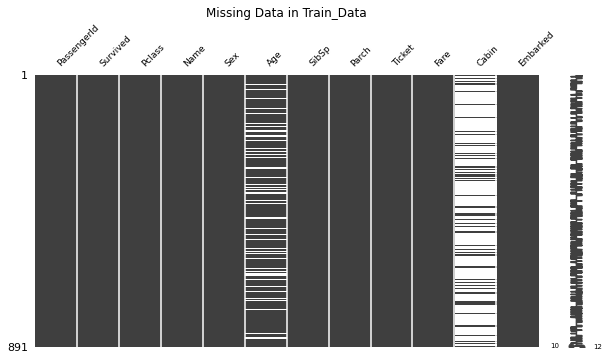

In [58]:
missingno.matrix(train, figsize = (10,5), fontsize = 9)
plt.title("Missing Data in Train_Data")

Text(0.5, 1.0, 'Missing Data in Test_Data')

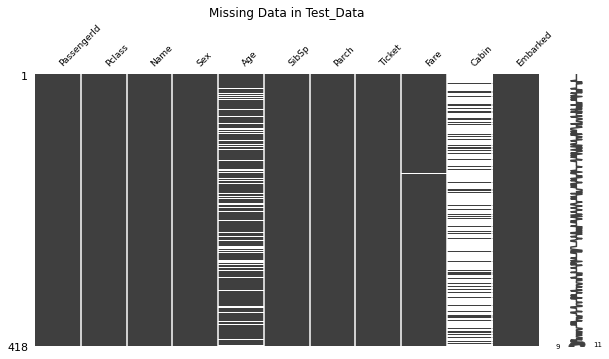

In [59]:
missingno.matrix(test, figsize = (10,5), fontsize = 9)
plt.title("Missing Data in Test_Data")

In [61]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


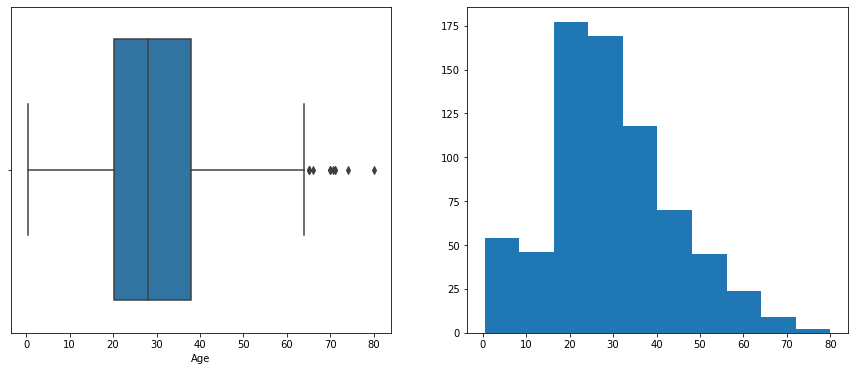

In [74]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
sns.boxplot(x = train["Age"], ax = ax[0])
plt.hist(train["Age"]);

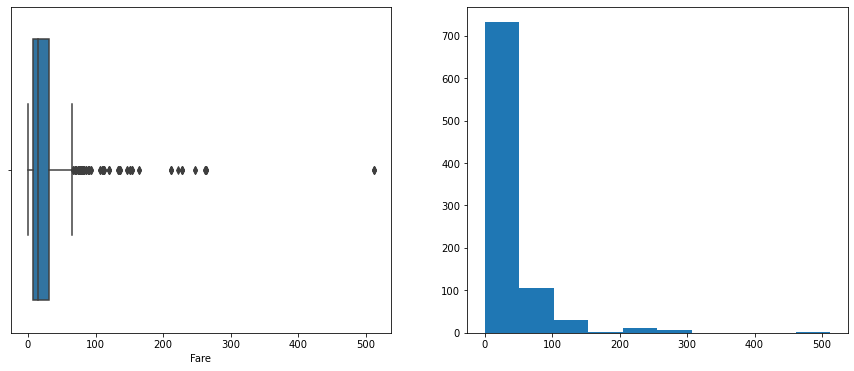

In [73]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
sns.boxplot(x= train["Fare"], ax=ax[0])
plt.hist(train["Fare"]);

In [78]:
train.select_dtypes("object") # 문자열로 이루어진 행

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [81]:
train.select_dtypes("number") # 숫자만으로 이루어진 행

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [84]:
correlation = train.select_dtypes("number").corr() # 숫자만으로 이루어진 행들의 공분산
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


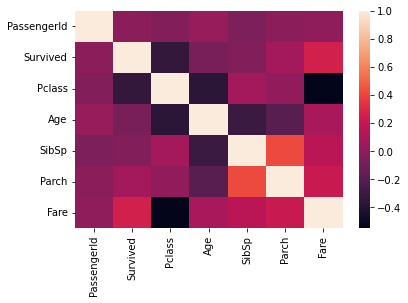

In [89]:
sns.heatmap(correlation);

### Data Wrangling(Gathering Data)
#### raw data를 분석하기 좋은 데이터로 변환하는 작업
1. Gather : 데이터를 모음
2. Assess : 얻은 데이터를 읽고 데이터가 깨끗한지 판단
3. Clean : 데이터를 정제하는 방법으로는 Define, Code, Test가 있음. 어떤 부분을 정제할 지 정의하고, 정제하기 위한 코드를 짜고, 잘 정제가 되었는지 테스트를 해보는 작업.
4. Reassess and Iterate : 다시 2단계로 돌아가 데이터가 잘 정제되었는지 판단.
5. Store : 데이터 사용을 위해 저장하는 단계.

In [92]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    # 결측치 채우기
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    
    # sibsp : 함께 탑승한 형제 또는 배우자 수
    # parch : 함께 탑승한 부모 또는 자녀 수
    # 가족 관계와 관련된 내용만을 담은 FamilyOnBoard
    df["FamilyOnBoard"] = df["SibSp"] + df["Parch"]
    df.drop(columns = ["SibSp", "Parch"], inplace = True)
    
    df["Title"] = df["Name"].str.split(" ", expand=True)[1]